In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
df = pd.read_csv(r'C:\Users\HP\Documents\datasets\heart-disease-uci\heart.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
columns = df.columns

In [5]:
columns.drop(['target'])

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [6]:

y = df['target']

In [7]:
X = df[columns]

In [8]:
X.drop('target', inplace = True, axis = 1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:
from sklearn.model_selection import GridSearchCV

In [45]:
param_grid = {
    'max_depth': list(range(1,1001))}
dt = DecisionTreeClassifier()
gs = GridSearchCV(dt, param_grid, scoring='f1', cv=5)
gs.fit(X, y)
print("best params:", gs.best_params_)
print("best score:", gs.best_score_)

best params: {'max_depth': 3}
best score: 0.8187941072118079


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [13]:
%%time
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predict = model.predict(X_test)

Wall time: 5.99 ms


In [14]:
print("Accuracy:",metrics.accuracy_score(y_test, predict))
print("Precision:", metrics.precision_score(y_test, predict))
print("Recall:", metrics.recall_score(y_test, predict))
def specificity_score(y_true, y_pred):
    p, r, f, s = metrics.precision_recall_fscore_support(y_true, y_pred)
    return r[0]
print("sensitivity:", metrics.recall_score(y_test, predict))
print("specificity:", specificity_score(y_test, predict))
print("f1 score:", metrics.f1_score(y_test, predict))

Accuracy: 0.8131868131868132
Precision: 0.8297872340425532
Recall: 0.8125
sensitivity: 0.8125
specificity: 0.813953488372093
f1 score: 0.8210526315789474


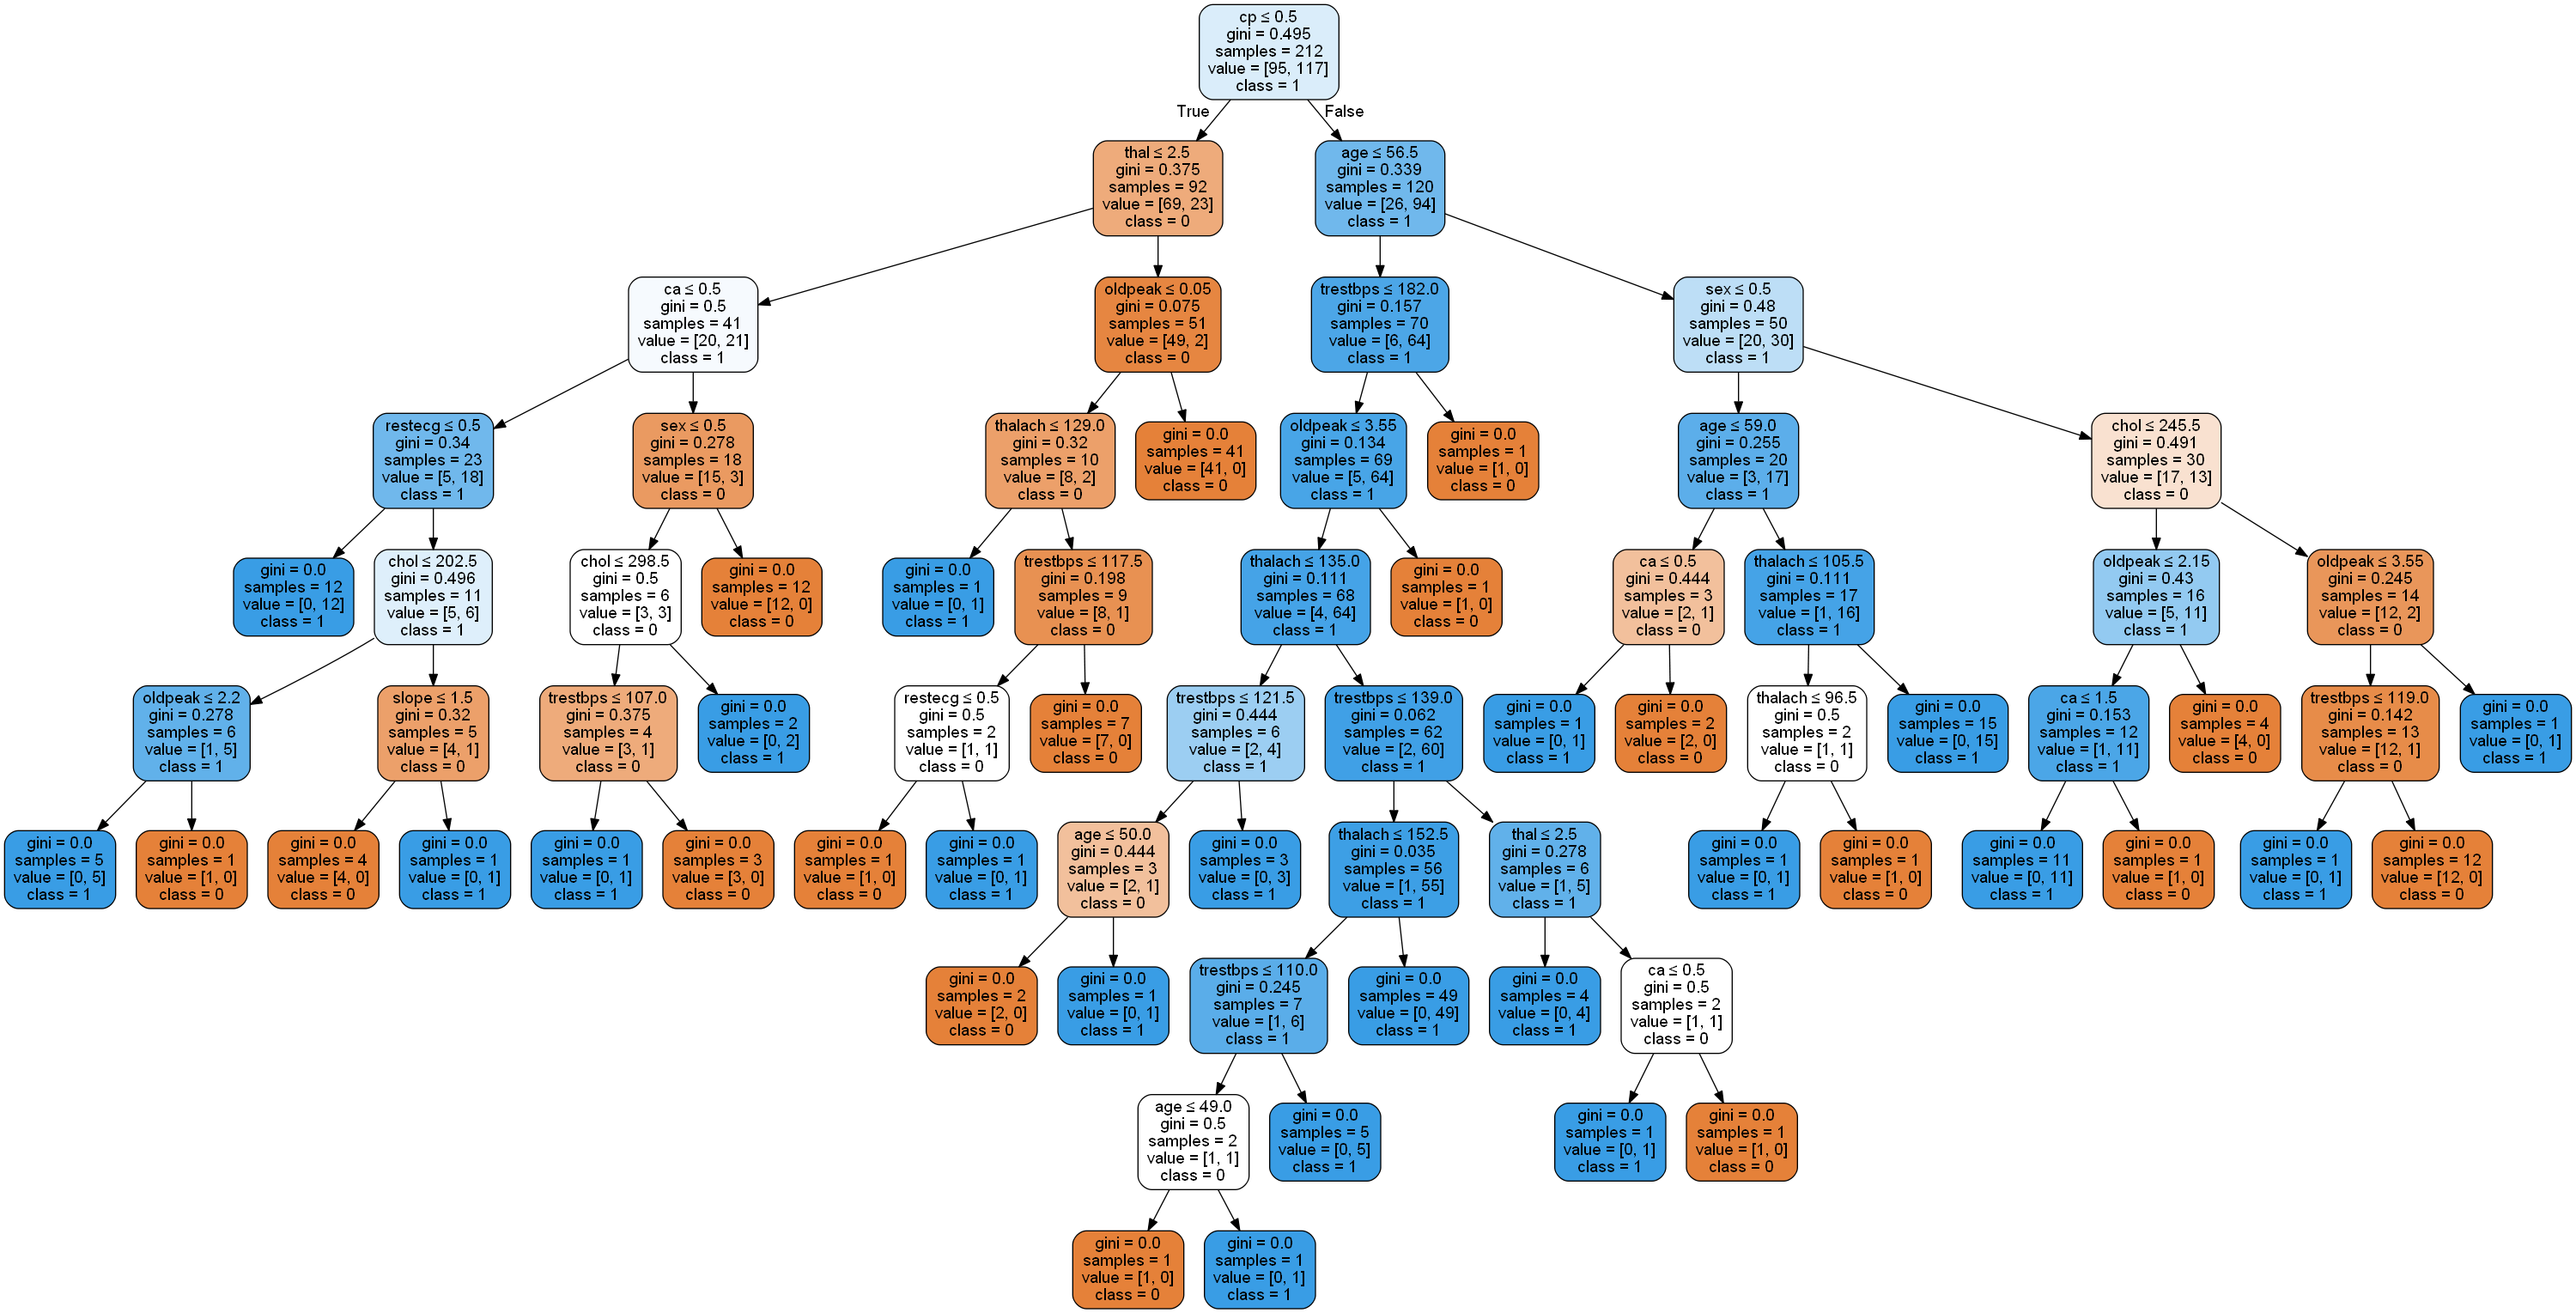

In [15]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = columns.drop('target'),class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('heart.png')
Image(graph.create_png())

In [65]:
df1 = pd.read_csv(r'C:\Users\HP\Documents\datasets\cardio.csv')

In [66]:
df1

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [67]:
columns1 = df1.columns

In [68]:
columns1

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [69]:
df1['age'] = df1['age']/365.25
df1['age'] = df1['age'].round()
y1 = df1['cardio']
X1 = df1[columns1]
X1.drop('cardio', inplace = True, axis = 1)

In [70]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3)

In [71]:
%%time
model = DecisionTreeClassifier()
model.fit(X_train1, y_train1)
predict1 = model.predict(X_test1)

Wall time: 1.88 s


In [72]:
print("Accuracy:",metrics.accuracy_score(y_test1, predict1))
print("Precision:", metrics.precision_score(y_test1, predict1))
print("Recall:", metrics.recall_score(y_test1, predict1))
def specificity_score(y_true, y_pred):
    p, r, f, s = metrics.precision_recall_fscore_support(y_true, y_pred)
    return r[0]
print("sensitivity:", metrics.recall_score(y_test1, predict1))
print("specificity:", specificity_score(y_test1, predict1))
print("f1 score:", metrics.f1_score(y_test1, predict1))

Accuracy: 0.6333809523809524
Precision: 0.640981240981241
Recall: 0.6268109125117591
sensitivity: 0.6268109125117591
specificity: 0.640115718418515
f1 score: 0.6338168846611176


In [ ]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = columns1.drop('cardio'),class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('heart1.png')
Image(graph.create_png())